# Exloratory data analysis

# Prakruthi B Gopal 
# 21BDA25

Reading and cleaning the data

In [96]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
housing = pd.read_csv("C:/Users/91866/OneDrive/Desktop/kc_house_data.csv")

In [4]:
housing.shape

(21613, 21)

In [5]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
housing.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5801,3581000020,20140926T000000,350000.0,3,1.00,1180,7455,1.0,0,0,...,7,1180,0,1964,0,98034,47.7276,-122.241,1450,8154
3861,1118001295,20141203T000000,2200000.0,4,3.00,3540,11098,2.0,0,0,...,10,3000,540,1940,0,98112,47.6340,-122.288,3430,8214
1779,8911000030,20141210T000000,355000.0,3,1.00,1240,5400,1.0,0,0,...,7,1060,180,1940,0,98133,47.7115,-122.355,1429,5400
17597,1923300315,20150217T000000,565000.0,2,1.75,1720,3000,1.0,0,0,...,7,860,860,1925,0,98103,47.6860,-122.351,1360,4500
17266,1024069063,20140923T000000,620000.0,4,2.50,2720,34498,1.0,0,0,...,7,1360,1360,1966,0,98075,47.5832,-122.020,1920,22474


In [7]:
housing.drop("date", axis=1, inplace=True)

In [8]:
housing.drop('zipcode',axis=1,inplace=True)

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [10]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [11]:
housing.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
housing['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [13]:
housing['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [14]:
housing.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406


In [15]:
housing['renovated_or_not'] = housing['yr_renovated'].apply(lambda x : 'yes' if x!=0 else 'no')
housing.drop('yr_renovated', axis=1, inplace=True)

In [16]:
housing['floors'].astype('float')


0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
21608    3.0
21609    2.0
21610    2.0
21611    2.0
21612    2.0
Name: floors, Length: 21613, dtype: float64

In [17]:
housing_filtered=housing[(housing['bedrooms']<=5) & (housing['bedrooms']!=0)]

In [18]:
housing_filtered['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
1     199
Name: bedrooms, dtype: int64

In [19]:
housing_filtered.shape

(21266, 19)

Visualization

In [20]:
housing_filtered.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated_or_not
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,no
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,yes
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,no
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,no
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,no


In [21]:
housing_filtered = housing_filtered.astype({"floors": int})


In [22]:
housing_filtered['floors'].value_counts()

1    12428
2     8227
3      611
Name: floors, dtype: int64

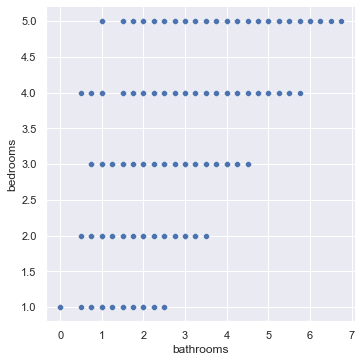

In [23]:
sns.relplot(x='bathrooms',y='bedrooms',data=housing_filtered)

In [24]:
#five and four bedroom houses have the most number of bathrooms

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

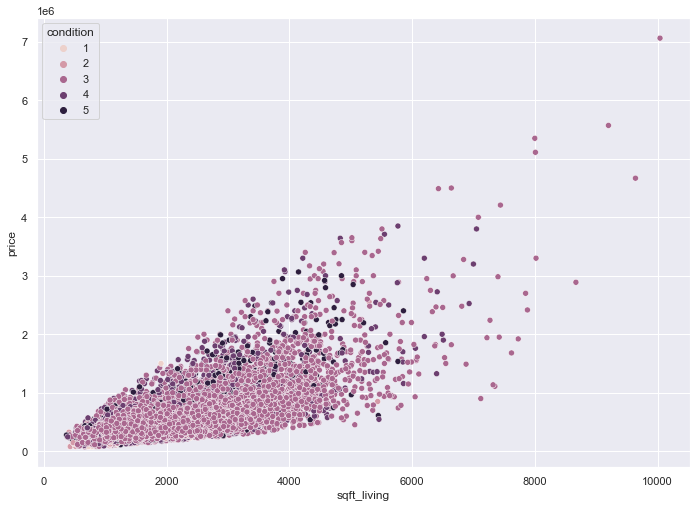

In [25]:
sns.scatterplot(x='sqft_living',y='price',hue='condition',data=housing_filtered)

In [26]:
#there is no house with a condition of 4 or 5 and living area greater than 8000 sqft

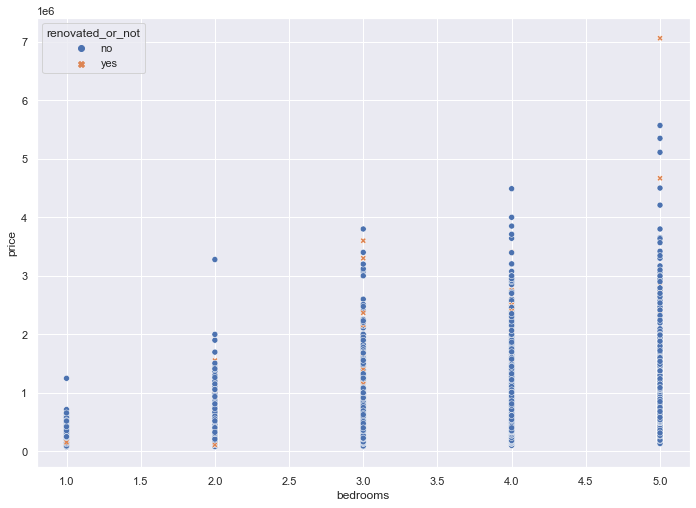

In [27]:
sns.scatterplot(x = "bedrooms", y = "price", hue= "renovated_or_not", style= "renovated_or_not", data =housing_filtered);

In [28]:
#most of the 5 bedroom houses are highly priced and most of the houses have not been renovated

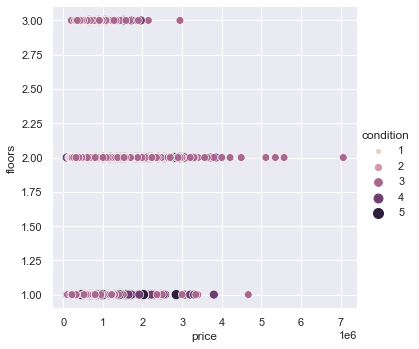

In [29]:
sns.relplot(x = "price", y = "floors", size = "condition", sizes = (20,100), hue = "condition", data =housing_filtered);

In [30]:
# the highest priced house has two floors, most of the houses with good condition are single storeyed

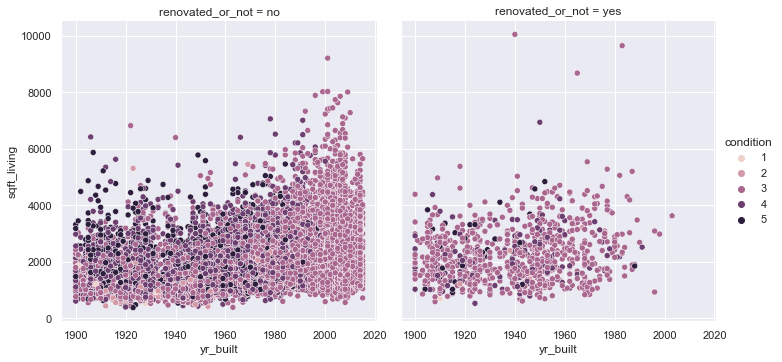

In [31]:
sns.relplot(x = "yr_built", y = "sqft_living", hue = "condition", col = "renovated_or_not", data = housing_filtered)

In [32]:
#most of the houses are not renovated , the houses which are renovated are mostly built between 1900 and 2000

In [33]:
housing_filtered.groupby('condition')['floors'].count()

condition
1       28
2      168
3    13822
4     5577
5     1671
Name: floors, dtype: int64

In [34]:
#most of the houses have an average conditon of 3

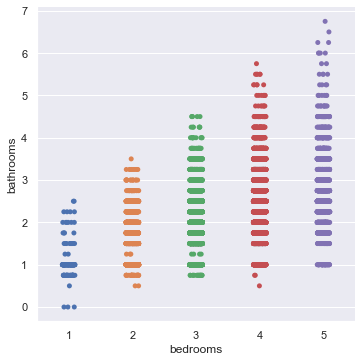

In [35]:
sns.catplot(x = "bedrooms", y = "bathrooms", data = housing_filtered)

In [36]:
#5 and 4 storeyed houses have the maximum number of bathrooms

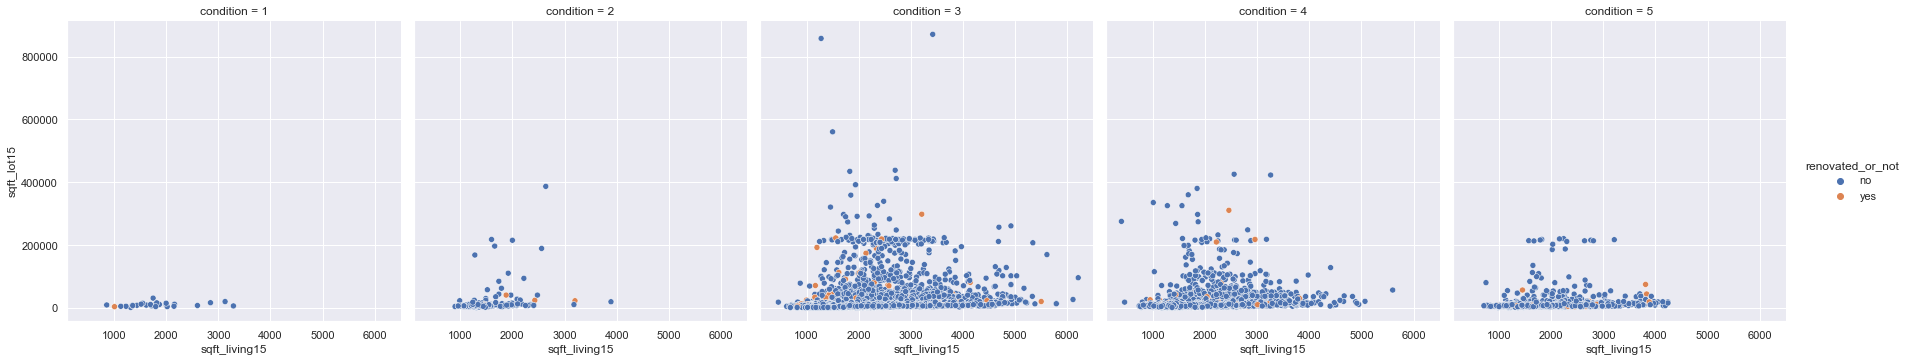

In [37]:
sns.relplot(x='sqft_living15',y='sqft_lot15',hue='renovated_or_not',col='condition',data=housing_filtered)

In [38]:
#most of the houses with a condition one or two have a squareft of living in the range of 1000 to 4000, there are very less houses which have been renovated and most of the houses have a condition of three.

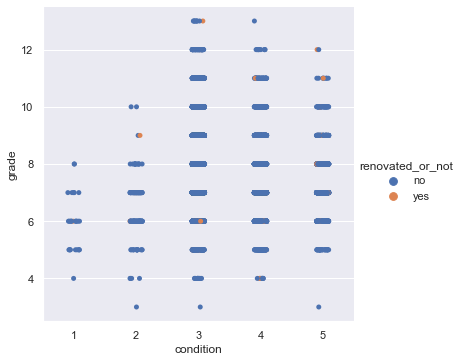

In [39]:
sns.catplot(x='condition',y='grade',hue='renovated_or_not',data=housing_filtered)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

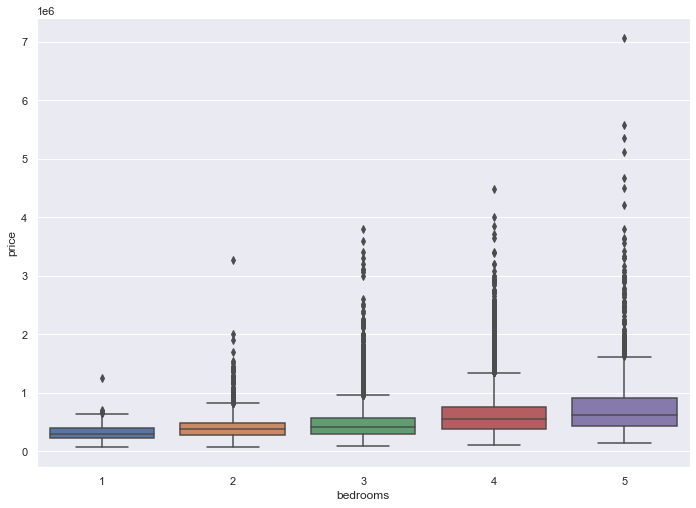

In [56]:
sns.boxplot(x='bedrooms', y='price', data=housing_filtered)

In [57]:
#most of the highly priced houses have 5 bedrooms 

<AxesSubplot:xlabel='condition', ylabel='sqft_above'>

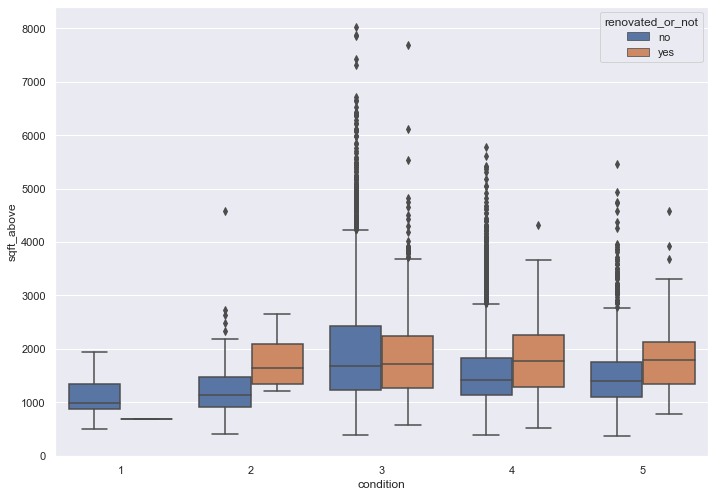

In [58]:
sns.boxplot(x='condition',y='sqft_above',hue='renovated_or_not',data=housing_filtered)

<AxesSubplot:xlabel='view', ylabel='price'>

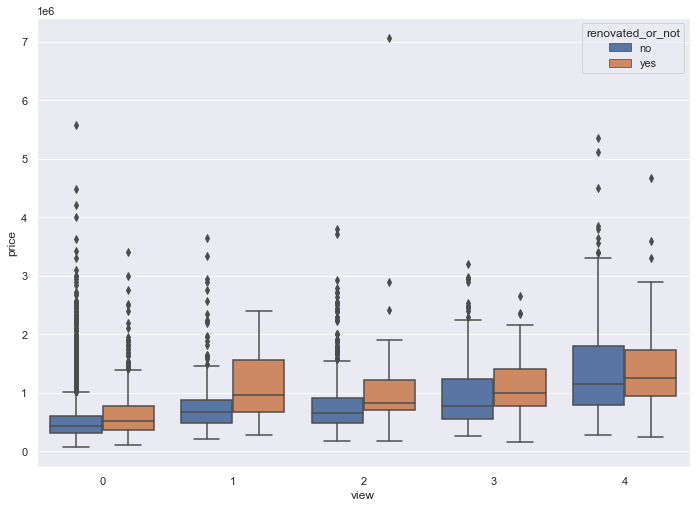

In [59]:
sns.boxplot(x='view',y='price',hue='renovated_or_not',data=housing_filtered)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

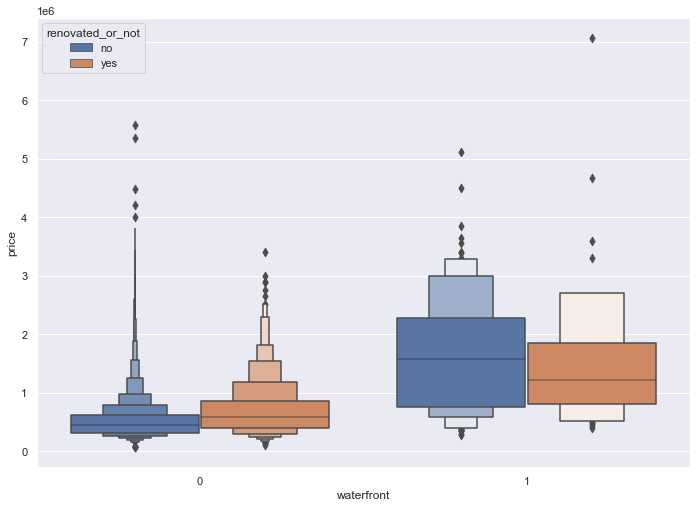

In [60]:
sns.boxenplot(x='waterfront',y='price',hue='renovated_or_not',data=housing_filtered)

<AxesSubplot:xlabel='floors', ylabel='bedrooms'>

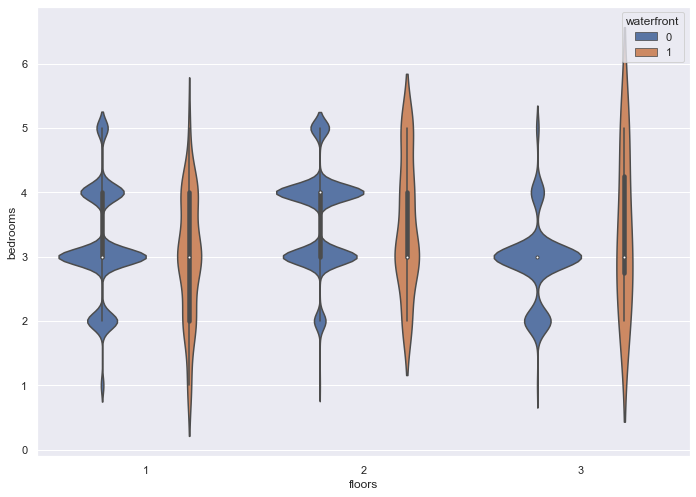

In [61]:
sns.violinplot(x='floors',y='bedrooms',hue='waterfront',data=housing_filtered)

<AxesSubplot:xlabel='condition', ylabel='price'>

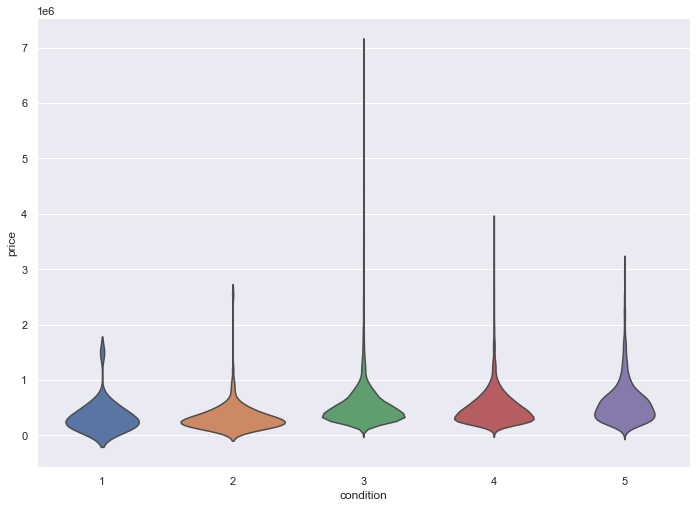

In [62]:
sns.violinplot(x = "condition", y = "price", inner = None, data =housing_filtered)

In [63]:
#price is the highest for houses with a condition of 3

<AxesSubplot:xlabel='waterfront', ylabel='price'>

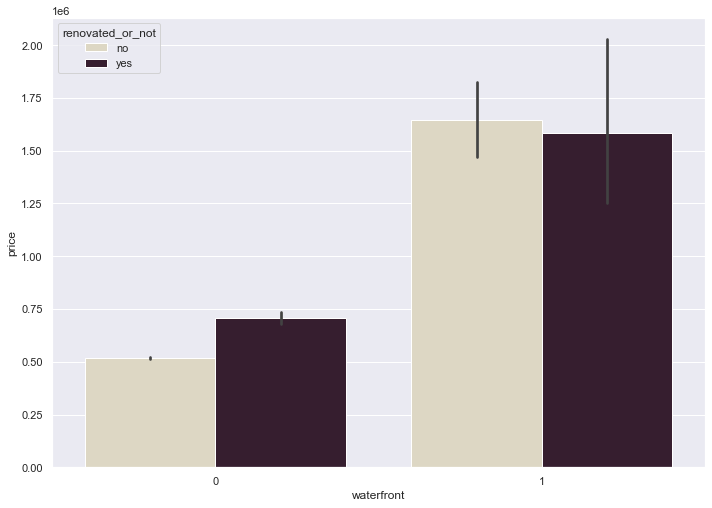

In [64]:
sns.barplot(x='waterfront',y='price',hue='renovated_or_not',palette = "ch:.36",data=housing_filtered)

<AxesSubplot:xlabel='floors', ylabel='count'>

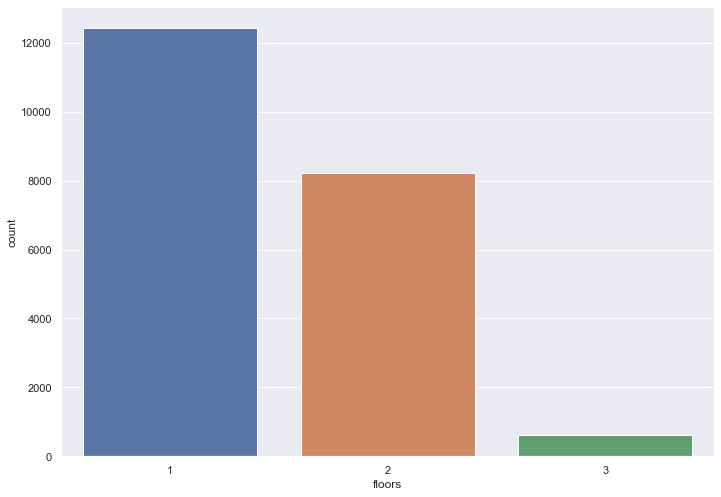

In [76]:
sns.countplot(data=housing_filtered,x='floors')

In [ ]:
#more number of houses with one floor were sold

<AxesSubplot:xlabel='grade', ylabel='count'>

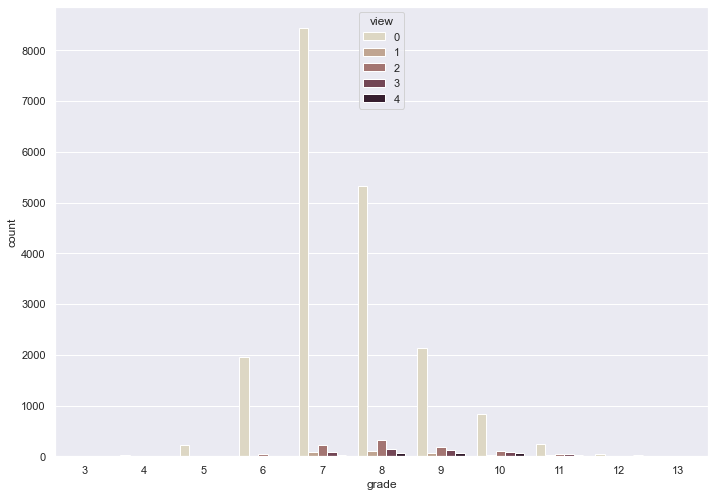

In [65]:
sns.countplot(x='grade',hue='view',palette = "ch:.36",data=housing_filtered)

In [66]:
#the most prevelant view is 0 and it is very common in the range of houses graded from 6 to 10

<AxesSubplot:xlabel='view', ylabel='price'>

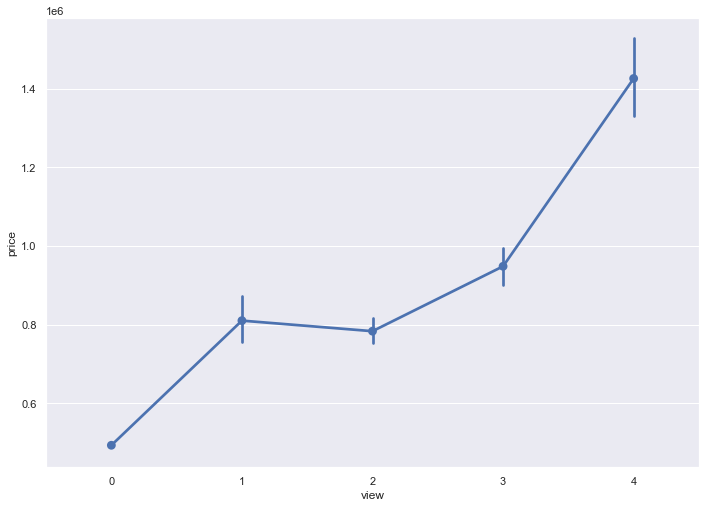

In [67]:
sns.pointplot(x = "view", y = "price", data= housing_filtered)

In [68]:
#houses with the best view have the highest price

Extra plots

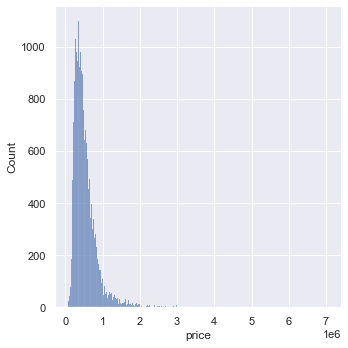

In [69]:
sns.displot(housing_filtered['price'])

<AxesSubplot:xlabel='view', ylabel='condition'>

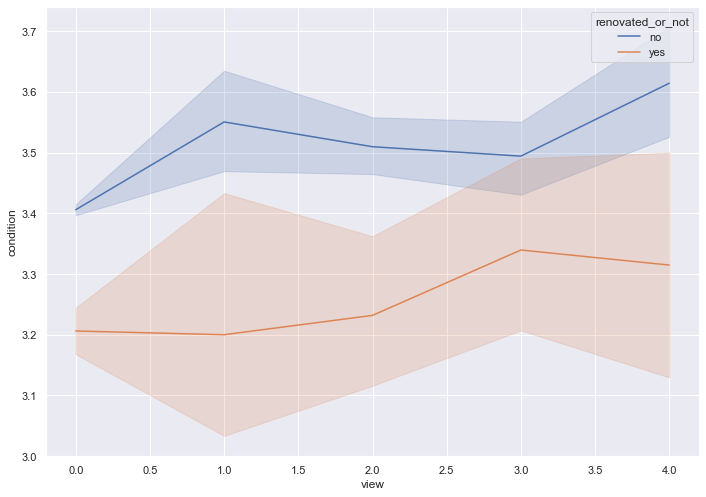

In [72]:
sns.lineplot(x='view',y='condition',hue='renovated_or_not',data=housing_filtered)

In [73]:
#most of the houses which are not renovated are seen to have a better conditon tham the ones which were renovated

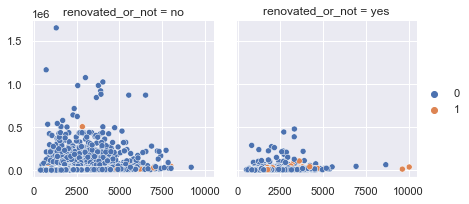

In [80]:
a = sns.FacetGrid(housing_filtered, col="renovated_or_not")
a.map_dataframe(sns.scatterplot, x="sqft_living",y="sqft_lot", hue="waterfront")
a.add_legend()

In [81]:
#most of the houses that have not been renovated lie between a square feet of not more than 7500, the houses with the maximum square feet have a water front

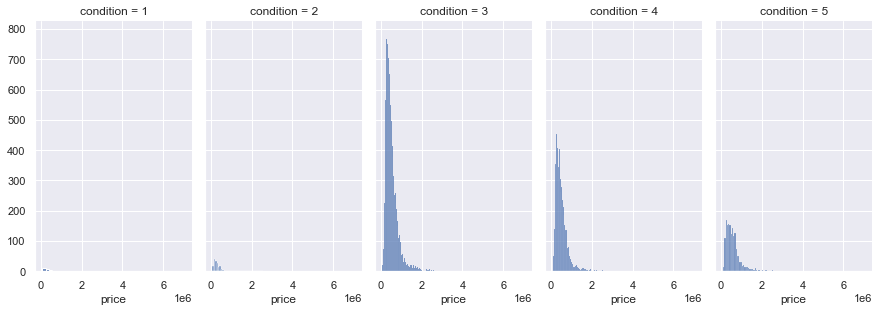

In [86]:
b = sns.FacetGrid(housing_filtered, col="condition", height=4.5, aspect=.55)
b.map(sns.histplot, "price")

In [84]:
#all the highest priced houses have a condition of 3

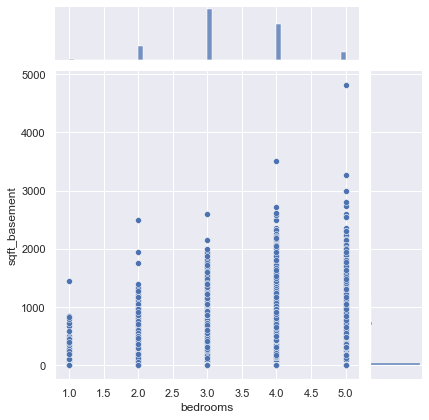

In [93]:
sns.jointplot(x='bedrooms', y='sqft_basement', data=housing_filtered)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

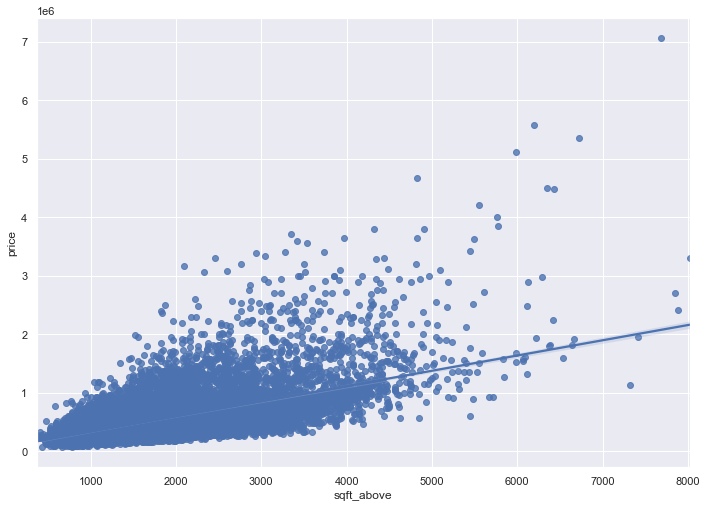

In [94]:
sns.regplot(x="sqft_above",y="price",data=housing_filtered)

# Simple linear regression and multiple linear regression

In [97]:
model_df = housing_filtered[['sqft_living', 'price']]

In [98]:
model_df

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


In [99]:
x=model_df.sqft_living
y=model_df.price

In [101]:
model=LinearRegression()

In [102]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [104]:
model.intercept_

-35296.05974489264

In [105]:
model.coef_

array([277.04527083])

In [106]:
model.score(np.array(x).reshape(-1,1),y)

0.4872684882605489

In [107]:
x=housing_filtered[['sqft_living','sqft_lot','sqft_above','sqft_basement']]
y=housing_filtered['price']

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [109]:
model = LinearRegression()

In [111]:
model.fit(x_train, y_train)

LinearRegression()

In [112]:
model.intercept_

-37929.74047639698

In [113]:
model.coef_

array([192.29355249,  -0.29849879,  85.02116594, 107.27238655])

In [114]:
model.score(x_train, y_train)

0.48976347413252375

In [115]:
model.predict(x_test)

array([233687.13961946, 892444.09802934, 692169.83133722, ...,
       350397.52339727, 510931.35629002, 393199.6043596 ])

In [116]:
y_test.values

array([275000., 987500., 599000., ..., 230000., 292000., 425000.])

In [117]:
model.score(x_test, model.predict(x_test))

1.0

In [118]:
model.score(x_train, model.predict(x_train))

1.0

In [119]:
model.score(x_test, y_test)

0.48330300506000534

In [120]:
model.score(x_train, y_train)

0.48976347413252375